In [1]:
import rasterio as rio
rgb = rio.open('https://data.tern.org.au/rs/public/data/remote-sensing/sentinel2/surface_reflectance/nsw/cvmsre_nsw_m201606201608_abma2.tif')

In [2]:
from rasterio.plot import show
show(rgb.read(), transform=rgb.transform)

MemoryError: Unable to allocate 189. GiB for an array with shape (6, 120213, 140411) and data type int16

Decimation factor= 511
array type:  <class 'numpy.ndarray'>
[[32767 32767 32767 ... 32767 32767 32767]
 [32767 32767 32767 ... 32767 32767 32767]
 [32767 32767 32767 ... 32767 32767 32767]
 ...
 [32767 32767 32767 ... 32767 32767 32767]
 [32767 32767 32767 ... 32767 32767 32767]
 [32767 32767 32767 ... 32767 32767 32767]]


Text(0, 0.5, 'Row #')

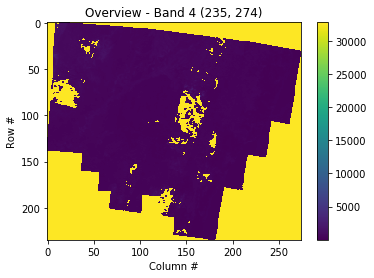

In [3]:
import rasterio
import matplotlib.pyplot as plt

# The grid of raster values can be accessed as a numpy array and plotted:
with rasterio.open('https://data.tern.org.au/rs/public/data/remote-sensing/sentinel2/surface_reflectance/nsw/cvmsre_nsw_m201606201608_abma2.tif') as src:
   oviews = src.overviews(1) # list of overviews from biggest to smallest
   oview = oviews[-1] # let's look at the smallest thumbnail
   print('Decimation factor= {}'.format(oview))
   # NOTE this is using a 'decimated read' (http://rasterio.readthedocs.io/en/latest/topics/resampling.html)
   thumbnail = src.read(1, out_shape=(1, int(src.height // oview), int(src.width // oview)))

print('array type: ',type(thumbnail))
print(thumbnail)

plt.imshow(thumbnail)
plt.colorbar()
plt.title('Overview - Band 4 {}'.format(thumbnail.shape))
plt.xlabel('Column #')
plt.ylabel('Row #')